# Explore the LS DR10 cross-matches for potential SN Ia

Author: Melissa Graham

## Set up and read files

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

Read in the nightly epoch light curves for all candidates.

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

Read in the parameters for the nightly epoch light curves for all candidates.

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

Read in the list of candidate IDs for potential SNIa that Melissa made with the MLG_snia_menagerie.ipynb notebook.

In [5]:
potSNIa_candid = np.loadtxt('potential_snia_list.dat', dtype='str', usecols=(0))

Read in all rows of the cross-matched file.

`flagstar` : 1 if matched to a star; 0 if matched to a galaxy; -1 if unmatched (int) 

`flagcore` : 1 if matched to the core of the galaxy; 0 otherwise (int) 

`flagmatch` : 1 if a star AND galaxy met constraints; 0 if one or the other; -1 if unmatched (int) 


In [6]:
fnm = '../cross_matched_LSDR10/candidate_xmatch_LSdr10.dat'
lsdr10xm_candid   = np.loadtxt(fnm, dtype='str', usecols=(0))
lsdr10xm_candra   = np.loadtxt(fnm, dtype='float', usecols=(1))
lsdr10xm_canddec  = np.loadtxt(fnm, dtype='float', usecols=(2))
lsdr10xm_flagstar = np.loadtxt(fnm, dtype='int', usecols=(4))
lsdr10xm_flagcore = np.loadtxt(fnm, dtype='int', usecols=(5))
lsdr10xm_flagmatch= np.loadtxt(fnm, dtype='int', usecols=(6))
lsdr10xm_sep      = np.loadtxt(fnm, dtype='float', usecols=(7))
lsdr10xm_ra       = np.loadtxt(fnm, dtype='float', usecols=(8))
lsdr10xm_dec      = np.loadtxt(fnm, dtype='float', usecols=(9))
lsdr10xm_rmag     = np.loadtxt(fnm, dtype='float', usecols=(13))
lsdr10xm_type     = np.loadtxt(fnm, dtype='str', usecols=(15))
lsdr10xm_shaper   = np.loadtxt(fnm, dtype='float', usecols=(19))
lsdr10xm_rpsfsize = np.loadtxt(fnm, dtype='float', usecols=(21))  
lsdr10xm_meanpz   = np.loadtxt(fnm, dtype='float', usecols=(23))
lsdr10xm_stdpz    = np.loadtxt(fnm, dtype='float', usecols=(24))
lsdr10xm_specz    = np.loadtxt(fnm, dtype='float', usecols=(25))
del fnm

For every potential SNIa store its index in the `paramLC_` arrays 
as `mindex` for the `lsdr10xm_` arrays.

In [7]:
lsdr10xm_mindex = np.zeros(len(lsdr10xm_candid), dtype='int')-1

for cid in potSNIa_candid:
    tx = np.where(lsdr10xm_candid == cid)[0]
    if len(tx) == 1:
        ttx = np.where(paramLC_candid == cid)[0]
        if len(ttx) == 1:
            lsdr10xm_mindex[tx[0]] = ttx[0]
        del ttx
    del tx

Check that all the potential SNIa were successfully matched.

In [8]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
print(len(tx), ' should equal ', len(potSNIa_candid))

100  should equal  100


Read in the `sncosmo` results.

In [9]:
fnm = '2_all_potential_snia_fits/results_sncosmos.dat'

fit_cand = np.loadtxt(fnm, dtype='str', usecols=(0))
fit_est_z = np.loadtxt(fnm, dtype='float', usecols=(1))
fit_in_zlo = np.loadtxt(fnm, dtype='float', usecols=(2))
fit_in_zhi = np.loadtxt(fnm, dtype='float', usecols=(3))
fit_z = np.loadtxt(fnm, dtype='float', usecols=(4))
fit_ze = np.loadtxt(fnm, dtype='float', usecols=(5))
fit_t0 = np.loadtxt(fnm, dtype='float', usecols=(6))
fit_t0e = np.loadtxt(fnm, dtype='float', usecols=(7))
fit_x0 = np.loadtxt(fnm, dtype='float', usecols=(8))
fit_x0e = np.loadtxt(fnm, dtype='float', usecols=(9))
fit_x1 = np.loadtxt(fnm, dtype='float', usecols=(10))
fit_x1e = np.loadtxt(fnm, dtype='float', usecols=(11))
fit_c = np.loadtxt(fnm, dtype='float', usecols=(12))
fit_ce = np.loadtxt(fnm, dtype='float', usecols=(13))

fit_pmB = np.loadtxt(fnm, dtype='float', usecols=(14))
fit_pmg = np.loadtxt(fnm, dtype='float', usecols=(15))
fit_pmr = np.loadtxt(fnm, dtype='float', usecols=(16))
fit_pmi = np.loadtxt(fnm, dtype='float', usecols=(17))

del fnm

And the review flags from MLG.

In [10]:
fnm = '2_all_potential_snia_fits/MLG_review_ratings.txt'
mlg_review_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mlg_review_flag = np.loadtxt(fnm, dtype='int', usecols=(1))
del fnm

fit_mlgflag = np.zeros(len(fit_cand), dtype='int') - 1
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mlg_review_candid)[0]
    if len(tx) == 1:
        fit_mlgflag[c] = mlg_review_flag[tx[0]]
    del tx

For every potential SNIa store its index in the `fit_` arrays 
as `findex` for the `lsdr10xm_` arrays.

In [11]:
lsdr10xm_findex = np.zeros(len(lsdr10xm_candid), dtype='int')-1

for cid in potSNIa_candid:
    tx = np.where(lsdr10xm_candid == cid)[0]
    if len(tx) == 1:
        ttx = np.where(fit_cand == cid)[0]
        if len(ttx) == 1:
            lsdr10xm_findex[tx[0]] = ttx[0]
        del ttx
    del tx

In [12]:
tx = np.where(lsdr10xm_findex >= 0)[0]
print(len(tx), ' should equal ', len(potSNIa_candid))

100  should equal  100


## Number of potential SNIa with matches

Recall that the `flagstar` column is 1 if the nearest cross-match is a star
and 0 if it is a galaxy.

Recall that the `flagmatch` column is 1 if there was a nearby object of a different
type within the search radius, indicating potential confusion in object or host type.

Identify potential SNIa with no matches, star matches, and galaxy matches.

In [13]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
print(len(tx))

ax = np.where(lsdr10xm_flagstar[tx] == -1)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

print(' ')
print('Number of potential SN Ia that are cross-matched with:')
print('no source: ', len(ax))
print('a galaxy: ', len(bx))
print('a star: ', len(cx))

dx = np.where(lsdr10xm_flagmatch[tx[bx]] == 1)[0]
ex = np.where(lsdr10xm_flagmatch[tx[cx]] == 1)[0]

print(' ')
print('Number of potential SN Ia that are cross-matched with:')
print('a galaxy, but a star is nearby too: ', len(dx))
print(lsdr10xm_candid[tx[bx[dx]]])
print('a star, but a galaxy is nearby too: ', len(ex))
print(lsdr10xm_candid[tx[cx[ex]]])

del tx, ax, bx, cx, dx, ex

100
 
Number of potential SN Ia that are cross-matched with:
no source:  3
a galaxy:  84
a star:  13
 
Number of potential SN Ia that are cross-matched with:
a galaxy, but a star is nearby too:  8
['DC21cgfrp' 'DC21cyddn' 'DC21drcum' 'DC22gtpdx' 'DC22hvtwp' 'DC22hvuhl'
 'DC23jjloo' 'DC23kdata']
a star, but a galaxy is nearby too:  10
['DC21bwajh' 'DC21dqik' 'DC21fber' 'DC21jfcb' 'DC21lbmp' 'DC21lqtw'
 'DC21mp' 'DC23jwvwc' 'DC23khfqh' 'DC23kpkys']


In [15]:
# the fit_ array index for all the potential snia
fx = np.where(lsdr10xm_findex >= 0)[0]
tmp1 = lsdr10xm_findex[fx]

# the fit-but-flagged potential SNIa
ix = np.where((fit_z[tmp1] > -90.0) & (fit_mlgflag[tmp1] != 0))[0]
print('number fit but flagged: ', len(ix))

# index the fit-but-flagged potential SNIa in the xmatch array
tx = fx[ix]
del fx, tmp1, ix

ax = np.where(lsdr10xm_flagstar[tx] == -1)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

print(' ')
print('Number of FLAGGED potential SN Ia that are cross-matched with:')
print('no source: ', len(ax), '(', lsdr10xm_candid[tx[ax[0]]], lsdr10xm_candid[tx[ax[1]]], ')')
print('a galaxy: ', len(bx))
print('a star: ', len(cx))

dx = np.where(lsdr10xm_flagmatch[tx[bx]] == 1)[0]
ex = np.where(lsdr10xm_flagmatch[tx[cx]] == 1)[0]

print(' ')
print('Number of FLAGGED potential SN Ia that are cross-matched with:')
print('a galaxy, but a star is nearby too: ', len(dx))
print(lsdr10xm_candid[tx[bx[dx]]])
print('a star, but a galaxy is nearby too: ', len(ex))
print(lsdr10xm_candid[tx[cx[ex]]])

del tx, ax, bx, cx, dx, ex

number fit but flagged:  66
 
Number of FLAGGED potential SN Ia that are cross-matched with:
no source:  2 ( DC21dglus DC21mjrj )
a galaxy:  55
a star:  9
 
Number of FLAGGED potential SN Ia that are cross-matched with:
a galaxy, but a star is nearby too:  4
['DC21drcum' 'DC22hvuhl' 'DC23jjloo' 'DC23kdata']
a star, but a galaxy is nearby too:  6
['DC21bwajh' 'DC21lbmp' 'DC21lqtw' 'DC21mp' 'DC23khfqh' 'DC23kpkys']


In [22]:
# the fit_ array index for all the potential snia
fx = np.where(lsdr10xm_findex >= 0)[0]
tmp1 = lsdr10xm_findex[fx]

# the fit-but-UNflagged potential SNIa
ix = np.where((fit_z[tmp1] > -90.0) & (fit_mlgflag[tmp1] == 0))[0]
print('number fit but UNflagged: ', len(ix))

# index the fit-but-UNflagged potential SNIa in the xmatch array
tx = fx[ix]
del fx, tmp1, ix

ax = np.where(lsdr10xm_flagstar[tx] == -1)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

print(' ')
print('Number of UNFLAGGED potential SN Ia that are cross-matched with:')
print('no source: ', len(ax), '(', lsdr10xm_candid[tx[ax[0]]], ')')
print('a galaxy: ', len(bx))
print('a star: ', len(cx))

dx = np.where(lsdr10xm_flagmatch[tx[bx]] == 1)[0]
ex = np.where(lsdr10xm_flagmatch[tx[cx]] == 1)[0]

print(' ')
print('Number of UNFLAGGED potential SN Ia that are cross-matched with:')
print('a galaxy, but a star is nearby too: ', len(dx))
print(lsdr10xm_candid[tx[bx[dx]]])
print('a star, but a galaxy is nearby too: ', len(ex))
print(lsdr10xm_candid[tx[cx[ex]]])

del tx, ax, bx, cx, dx, ex

number fit but UNflagged:  34
 
Number of UNFLAGGED potential SN Ia that are cross-matched with:
no source:  1 ( DC23jsner )
a galaxy:  29
a star:  4
 
Number of UNFLAGGED potential SN Ia that are cross-matched with:
a galaxy, but a star is nearby too:  4
['DC21cgfrp' 'DC21cyddn' 'DC22gtpdx' 'DC22hvtwp']
a star, but a galaxy is nearby too:  4
['DC21dqik' 'DC21fber' 'DC21jfcb' 'DC23jwvwc']


## Histograms

Plot some histograms to compare the cross-matched stars and galaxies.

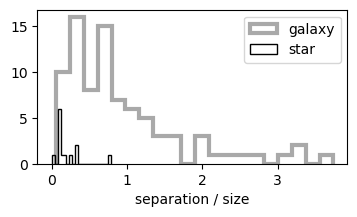

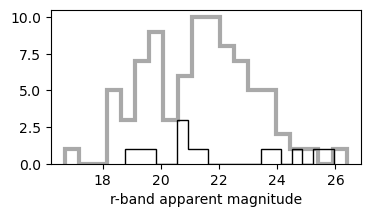

In [19]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

plt.figure(figsize=(4, 2))
plt.hist(lsdr10xm_sep[tx[bx]]/lsdr10xm_shaper[tx[bx]], bins=20, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_sep[tx[cx]]/lsdr10xm_rpsfsize[tx[cx]], bins=20, histtype='step', color='black', lw=1, label='star')
plt.xlabel('separation / size')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(4, 2))
plt.hist(lsdr10xm_rmag[tx[bx]], bins=20, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_rmag[tx[cx]], bins=20, histtype='step', color='black', lw=1, label='star')
plt.xlabel('r-band apparent magnitude')
plt.show()

del tx, bx, cx

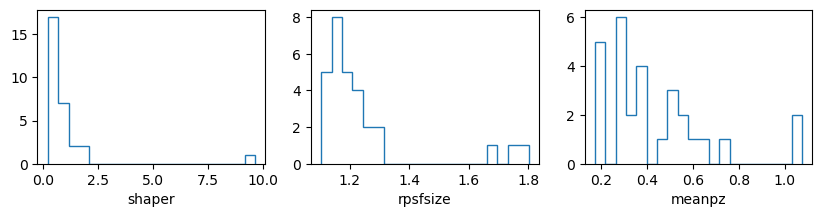

In [23]:
# the fit_ array index for all the potential snia
fx = np.where(lsdr10xm_findex >= 0)[0]
tmp1 = lsdr10xm_findex[fx]

# the fit-but-UNflagged potential SNIa
ix = np.where((fit_z[tmp1] > -90.0) & (fit_mlgflag[tmp1] == 0))[0]

# index the fit-but-UNflagged potential SNIa in the xmatch array
tx = fx[ix]
del fx, tmp1, ix

bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]

fig, ax = plt.subplots(1, 3, figsize=(10, 2))

ax[0].hist(lsdr10xm_shaper[tx[bx]], bins=20, histtype='step')
ax[0].set_xlabel('shaper')

ax[1].hist(lsdr10xm_rpsfsize[tx[bx]], bins=20, histtype='step')
ax[1].set_xlabel('rpsfsize')

x = np.where(lsdr10xm_meanpz[tx[bx]] > 0.0)[0]
ax[2].hist(lsdr10xm_meanpz[tx[bx[x]]], bins=20, histtype='step')
ax[2].set_xlabel('meanpz')

plt.show()

del tx, bx, x

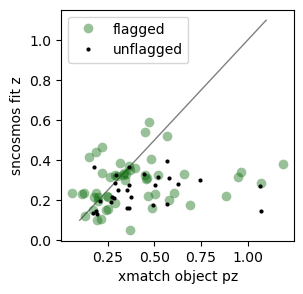

In [24]:
# the fit_ array index for all the potential snia
fx = np.where(lsdr10xm_findex >= 0)[0]
tmp1 = lsdr10xm_findex[fx]

# the fit-but-UNflagged potential SNIa
ix = np.where((fit_z[tmp1] > -90.0) & (fit_mlgflag[tmp1] == 0))[0]
jx = np.where((fit_z[tmp1] > -90.0) & (fit_mlgflag[tmp1] != 0))[0]

# index the fit-but-UNflagged potential SNIa in the xmatch array
tx = fx[ix]
ttx = fx[jx]
del fx, tmp1, ix, jx

bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
bbx = np.where(lsdr10xm_flagstar[ttx] == 0)[0]

x = np.where(lsdr10xm_meanpz[tx[bx]] > 0.0)[0]
xx = np.where(lsdr10xm_meanpz[ttx[bbx]] > 0.0)[0]

plt.figure(figsize=(3, 3))
plt.plot([0.1,1.1], [0.1,1.1], lw=1, color='grey')

plt.plot(lsdr10xm_meanpz[ttx[bbx[xx]]], fit_z[lsdr10xm_findex[ttx[bbx[xx]]]], 
         'o', ms=7, alpha=0.4, mew=0, color='darkgreen', label='flagged')

plt.plot(lsdr10xm_meanpz[tx[bx[x]]], fit_z[lsdr10xm_findex[tx[bx[x]]]], 
         'o', ms=3, mew=0, color='black', label='unflagged')

plt.xlabel('xmatch object pz')
plt.ylabel('sncosmos fit z')
plt.legend(loc='best')
plt.show()


del tx, bx, x, ttx, bbx, xx

## Light curves

Plot the light curves of the 4 unflagged potential SNIa that are cross-matched to stars.

For all of them, a galaxy is nearby too.



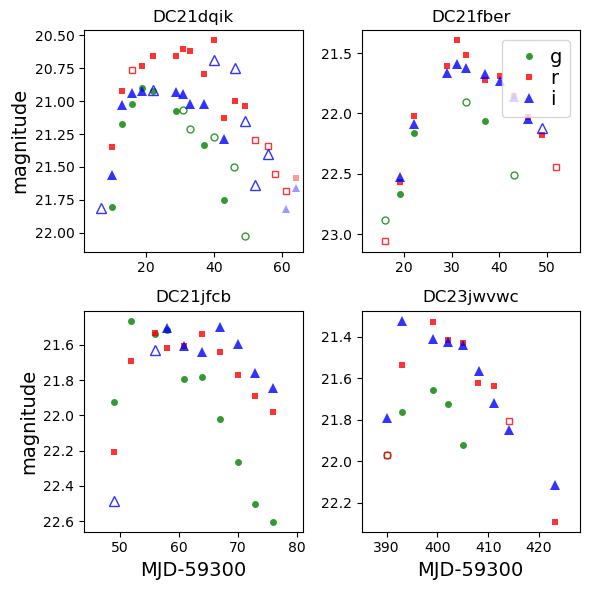

In [30]:
# tx = np.where(lsdr10xm_mindex >= 0)[0]
# ttx = np.where(lsdr10xm_flagstar[tx] == 1)[0]
# sx = lsdr10xm_mindex[tx[ttx]]
# del tx, ttx

usecands = np.asarray(['DC21dqik', 'DC21fber', 'DC21jfcb', 'DC23jwvwc'], dtype='str')
fig, ax = plt.subplots( 2, 2, figsize=(6, 6), sharex=False, sharey=False )
s = 0

for i in range(2):
    ax[i, 0].set_ylabel('magnitude', fontsize=14)
    for j in range(2):
        for f,filt in enumerate(all_filters):
            cx0 = np.where((candLC_candid == usecands[s]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == usecands[s]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
            cx2 = np.where((candLC_candid == usecands[s]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
            ax[i, j].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
            ax[i, j].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
            ax[i, j].plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                         all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            del cx0, cx1, cx2

        cx = np.where((candLC_candid == usecands[s]) & (candLC_lef == 0))[0]
        xmin = np.min(candLC_mjd[cx])
        xmax = np.max(candLC_mjd[cx])
        del cx
        ax[i, j].invert_yaxis()
        ax[i, j].set_xlim([xmin-59300.-5, xmax-59300.+5])
        del xmin, xmax
        ax[i, j].set_title(usecands[s])
        s += 1

ax[0, 1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(2):
    ax[1, j].set_xlabel('MJD-59300', fontsize=14)

plt.tight_layout()
plt.show()

In [31]:
fnm = '../cross_matched_LSDR10/candidate_links.dat'

link_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
link_lsview = np.loadtxt(fnm, dtype='str', usecols=(1))
link_rkview = np.loadtxt(fnm, dtype='str', usecols=(2))

print('%10s  %8s  %9s  %5s  %8s  %5s' % ('candid','flagstar','flagmatch','sep','rpsfsize','mag'))

for temp in usecands:
    tx = np.where(link_candid == temp)[0]
    jx = np.where(lsdr10xm_candid == temp)[0]
    print('%10s  %8i  %9i  %5.2f  %8.6f  %5.2f' % 
          (temp, lsdr10xm_flagstar[jx[0]], lsdr10xm_flagmatch[jx[0]], 
          lsdr10xm_sep[jx[0]], lsdr10xm_rpsfsize[jx[0]], lsdr10xm_rmag[jx[0]]))
    print(link_lsview[tx[0]])
    print(link_rkview[tx[0]])
    del tx

del fnm

    candid  flagstar  flagmatch    sep  rpsfsize    mag
  DC21dqik         1          1   0.10  1.179211  24.02
https://www.legacysurvey.org/viewer/cutout.jpg?ra=151.689426712647&dec=2.00556682067166&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21dqik
  DC21fber         1          1   0.30  1.237684  24.70
https://www.legacysurvey.org/viewer/cutout.jpg?ra=149.045078531139&dec=3.17994689983373&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21fber
  DC21jfcb         1          1   0.10  1.215312  25.94
https://www.legacysurvey.org/viewer/cutout.jpg?ra=150.7729446044&dec=2.88665225035047&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21jfcb
 DC23jwvwc         1          1   0.40  1.210548  25.25
https://www.legacysurvey.org/viewer/cutout.jpg?ra=150.699095590192&dec=2.65003680784035&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC23jwvwc


After reviewing the matches.

 * DC21dqik - galaxy (no star)
 * DC21fber - hard to say (star and galaxy)
 * DC21jfcb - nothing there
 * DC23jwvwc - galaxy (no star)
